In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/2021-olympics-medals-in-tokyo'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv


Importing Dataset and Important Libraries to work with. 

I welcome you all in this short and interesting EDA of olympics dataset. I will make sure that it do not waste your time. Read this till end and after reading the last line do provide me feedback or suggestions to improve myself. **Lets Start !** 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv("../input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv")

# **Data Exploration**

Lets Explore our dataset and see some interesting insights from the data.
And **Congratulations** if your country has won medals. :) 

In [4]:
l=df.columns
print(l)
print("Total Columns : ", len(l))

Index(['Country', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total',
       'Rank By Total'],
      dtype='object')
Total Columns :  6


In [5]:
df.head(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,38,39,33,110,1
1,People's Republic of China,38,31,18,87,2
2,Japan,27,14,17,58,5
3,Great Britain,21,21,22,64,4
4,ROC,20,27,23,70,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,Germany,10,11,16,37,8
8,Italy,10,10,20,40,7
9,France,9,12,11,32,10


In [6]:
df.tail(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
83,Mexico,0,0,4,4,46
84,Finland,0,0,2,2,66
85,Botswana,0,0,1,1,77
86,Burkina Faso,0,0,1,1,77
87,Côte d'Ivoire,0,0,1,1,77
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77
92,Syrian Arab Republic,0,0,1,1,77


In [7]:
# Viewing my Country in between bcz I already know its index. 
# Later I will do it using Code in below :)
df[40:50]

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
40,Bahamas,2,0,0,2,66
41,Kosovo,2,0,0,2,66
42,Ukraine,1,6,12,19,14
43,Belarus,1,3,3,7,33
44,Romania,1,3,0,4,46
45,Venezuela,1,3,0,4,46
46,India,1,2,4,7,33
47,"Hong Kong, China",1,2,3,6,39
48,Philippines,1,2,1,4,46
49,Slovakia,1,2,1,4,46


In [8]:
rows = df.shape[0]
cols = df.shape[1]
print("Total number of rows : ", rows)
print("Total number of columns : ", cols)
print("Total cells in Dataset : ", rows*cols)


Total number of rows :  93
Total number of columns :  6
Total cells in Dataset :  558


In [9]:
df.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.580645,3.559140,4.311828,11.451613,43.483871
std,6.933414,6.419167,6.206551,18.798425,24.199179
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,46.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,38.000000,39.000000,33.000000,110.000000,77.000000


In [10]:
# I know it has nothing to do in it. But still lets look at it.
df.describe(include = "all")

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93,93.000000,93.000000,93.000000,93.000000,93.000000
unique,93,NaN,NaN,NaN,NaN,NaN
top,Fiji,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.580645,3.559140,4.311828,11.451613,43.483871
std,NaN,6.933414,6.419167,6.206551,18.798425,24.199179
min,NaN,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,0.000000,0.000000,1.000000,2.000000,23.000000
50%,NaN,1.000000,1.000000,2.000000,4.000000,46.000000
75%,NaN,3.000000,4.000000,5.000000,11.000000,66.000000


In [11]:
df["Country"].describe()


count       93
unique      93
top       Fiji
freq         1
Name: Country, dtype: object

In [12]:
df.dtypes

Country          object
Gold Medal        int64
Silver Medal      int64
Bronze Medal      int64
Total             int64
Rank By Total     int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


Let me be **patriotic** and see **India's** Rank again. This time with the help of codes. 

In [14]:

print(df[df["Country"].values == "India"])

print("\n")
print("\n")
print("Other Way : ")
print("\n")
# Checking details for India 

# We can do this other way also. 
print(df.loc[df.Country=="India"])

   Country  Gold Medal  Silver Medal  Bronze Medal  Total  Rank By Total
46   India           1             2             4      7             33




Other Way : 


   Country  Gold Medal  Silver Medal  Bronze Medal  Total  Rank By Total
46   India           1             2             4      7             33


**Yayy, Cheers** . India won 7 medals in total. How many medals has your country won? Let me know in the comments. 

In [15]:
# Checking if we have any missing values in our dataset.
df.isnull().any().sum()

0

So we do not have any missing values in our dataset. Thats great . **Cheers again!**

**Lets Sort our Data First**

In [16]:
df.sort_values(by = ["Rank By Total"], ascending = True)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,38,39,33,110,1
1,People's Republic of China,38,31,18,87,2
4,ROC,20,27,23,70,3
3,Great Britain,21,21,22,64,4
2,Japan,27,14,17,58,5
...,...,...,...,...,...,...
63,Morocco,1,0,0,1,77
62,Bermuda,1,0,0,1,77
91,Republic of Moldova,0,0,1,1,77
81,Turkmenistan,0,1,0,1,77


Viewing India's Rank using the code below.

**Viewing top 5 countries according to the medals they have.** 

In [17]:
# Viewing top 5 countries with most number of bronge medals 
print("Top Countries with most number of Bronze Medals")
top_bm=df.nlargest(5, "Bronze Medal")[["Country","Bronze Medal"]]
print(top_bm)
print("\n")
print("\n")



Top Countries with most number of Bronze Medals
                    Country  Bronze Medal
0  United States of America            33
4                       ROC            23
3             Great Britain            22
5                 Australia            22
8                     Italy            20






Viewing top 5 countries with most number of Gold and Silver medals. 

In [18]:
print("Top Countries with most number of Gold Medals")
top_gm =df.nlargest(5, "Gold Medal")[["Country", "Gold Medal"]]
print(top_gm)

print("\n")
print("\n")

print("Top Countries with most number of Silver Medals")
print("\n")
top_sm = pd.DataFrame(df.nlargest(5, "Silver Medal")[["Country", "Silver Medal"]])
print(top_sm)

Top Countries with most number of Gold Medals
                      Country  Gold Medal
0    United States of America          38
1  People's Republic of China          38
2                       Japan          27
3               Great Britain          21
4                         ROC          20




Top Countries with most number of Silver Medals


                      Country  Silver Medal
0    United States of America            39
1  People's Republic of China            31
4                         ROC            27
3               Great Britain            21
2                       Japan            14


# Data Visualisation 

Plotting total medals won by each Country.

Text(0.5, 1.0, 'Total Medals per Country')

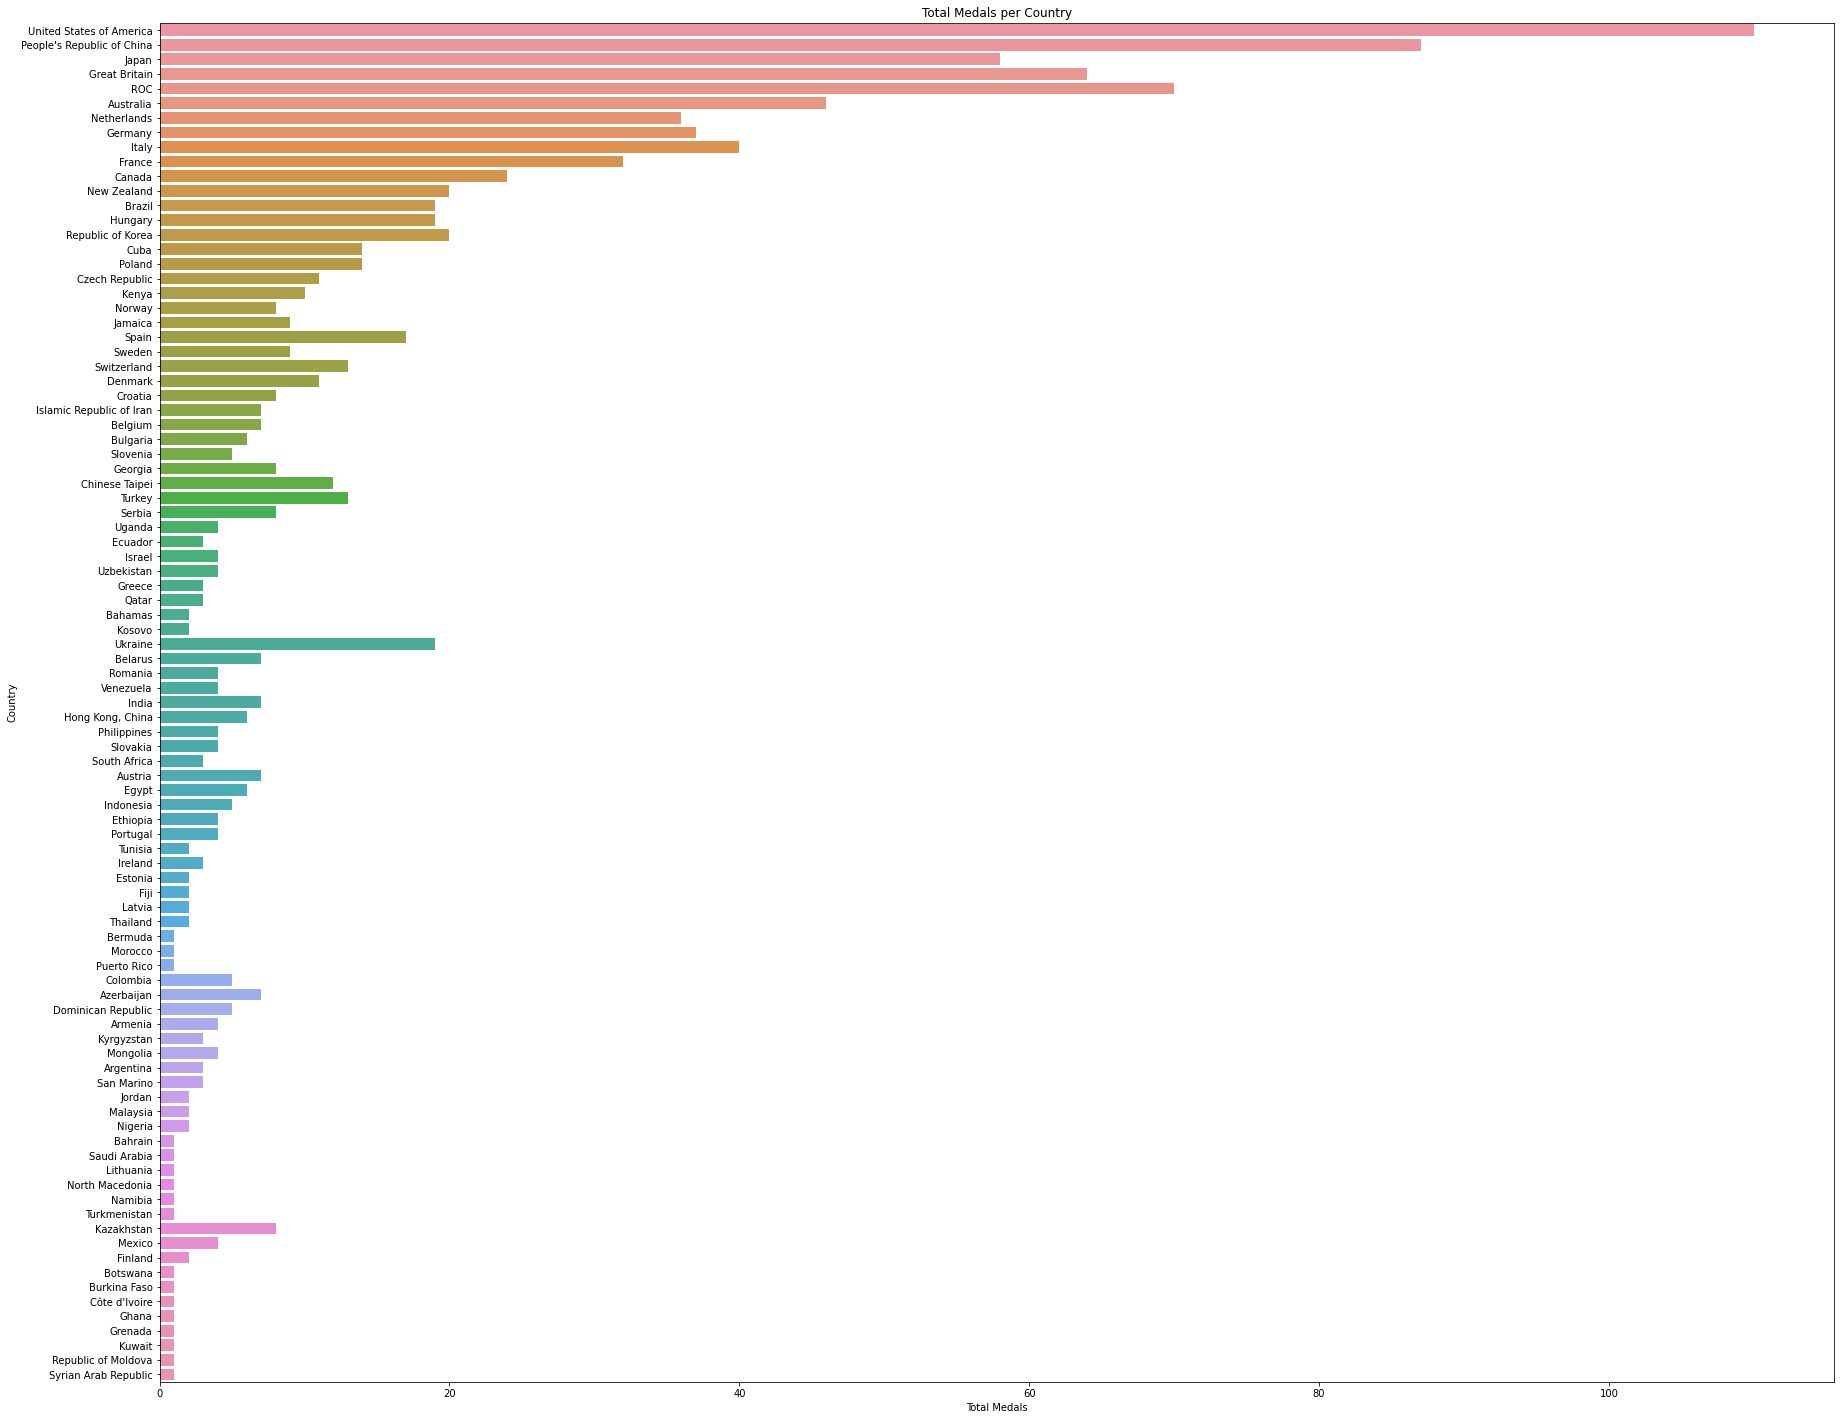

In [19]:
plt.figure(figsize=(30,25))
sns.barplot(y = "Country", x = "Total", data = df)
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.title('Total Medals per Country')

Lets see how many gold medals have been won in total.

In [20]:
total_gm =df["Gold Medal"].sum()
total_sm = df["Silver Medal"].sum()
total_bm = df["Bronze Medal"].sum()
print("Total Gold Medals won in olympics till now : ", df["Gold Medal"].sum())
print("Total Silver Medals won in olympics till now : ", df["Silver Medal"].sum())
print("Total Bronze Medals won in olympics till now : ", df["Bronze Medal"].sum())

Total Gold Medals won in olympics till now :  333
Total Silver Medals won in olympics till now :  331
Total Bronze Medals won in olympics till now :  401


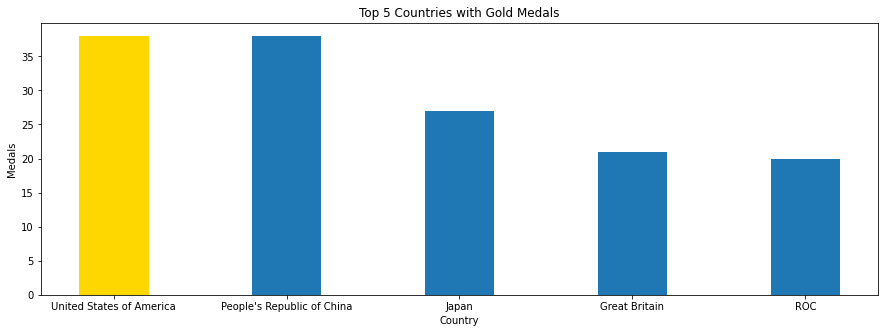

In [21]:
plt.figure(figsize= (15,5))
s=plt.bar(top_gm["Country"], top_gm["Gold Medal"], width = 0.4)
s[0].set_color("gold")
plt.xlabel("Country")
plt.ylabel("Medals")
plt.title("Top 5 Countries with Gold Medals")
plt.show()


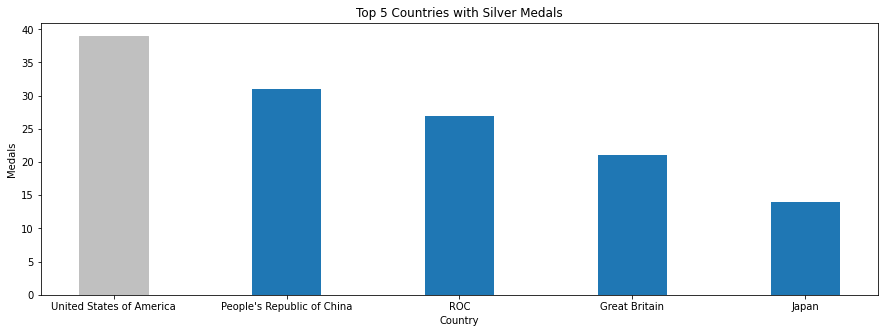

In [22]:
plt.figure(figsize= (15,5))
s=plt.bar(top_sm["Country"], top_sm["Silver Medal"], width = 0.4)
s[0].set_color("silver")

plt.xlabel("Country")
plt.ylabel("Medals")
plt.title("Top 5 Countries with Silver Medals")
plt.show()

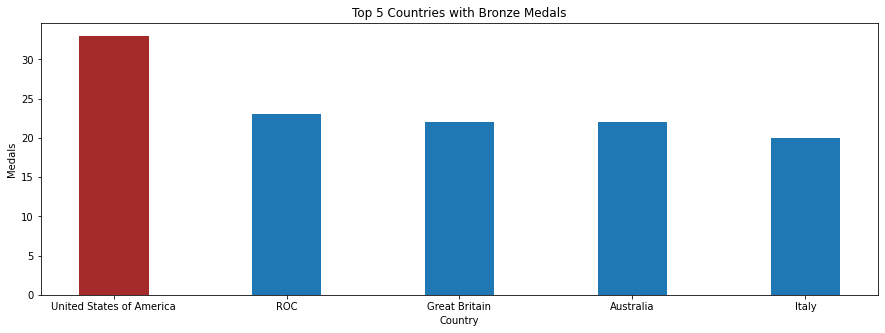

In [23]:
plt.figure(figsize= (15,5))
s=plt.bar(top_bm["Country"], top_bm["Bronze Medal"], width = 0.4)
s[0].set_color("brown")
plt.xlabel("Country")
plt.ylabel("Medals")
plt.title("Top 5 Countries with Bronze Medals")
plt.show()

**Creating Lineplot for the dataset.**

<AxesSubplot:>

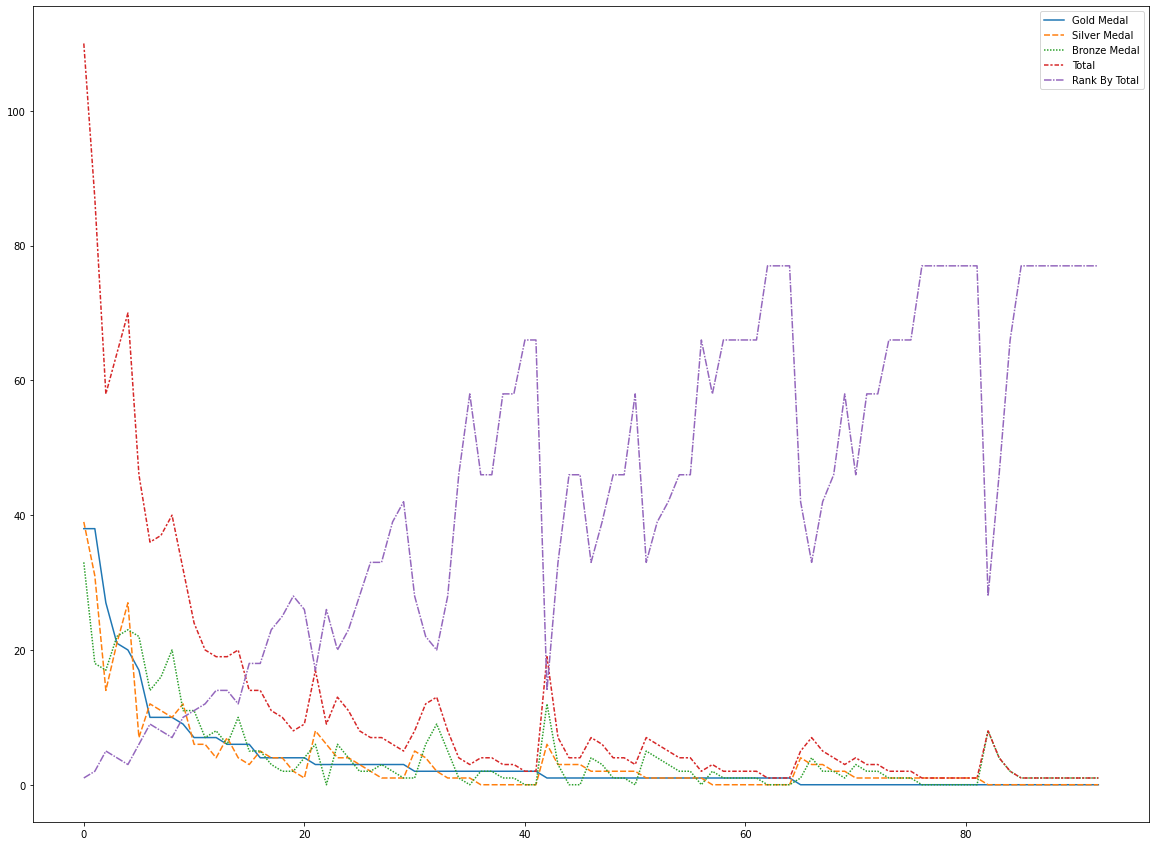

In [24]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.lineplot(data = df)

In [25]:
# Making table of Top 10 Countries Overall. 
top_10 = df.sort_values(by="Rank By Total",ascending=True)[:11]
top_10.reset_index()

,index,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,0,United States of America,38,39,33,110,1
1,1,People's Republic of China,38,31,18,87,2
2,4,ROC,20,27,23,70,3
3,3,Great Britain,21,21,22,64,4
4,2,Japan,27,14,17,58,5
5,5,Australia,17,7,22,46,6
6,8,Italy,10,10,20,40,7
7,7,Germany,10,11,16,37,8
8,6,Netherlands,10,12,14,36,9
9,9,France,9,12,11,32,10


Making Piechart for top 10 countries. 

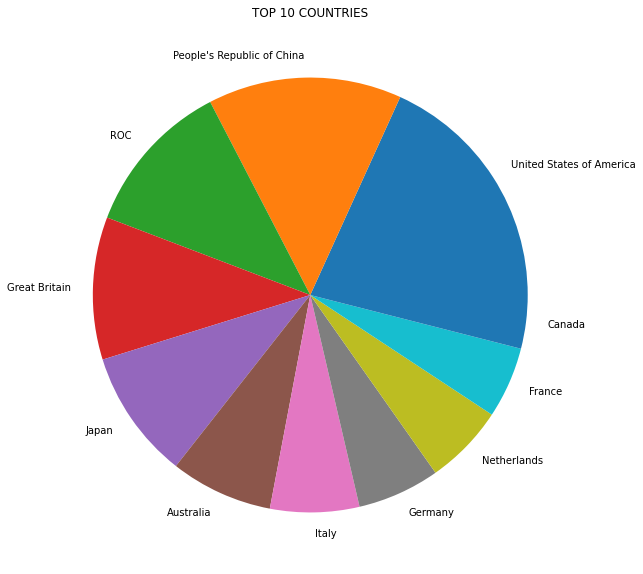

In [26]:
plt.figure(figsize=(12,10))
values = top_10["Total"]
label= top_10["Country"]
plt.pie(values, labels=label, labeldistance=1.1)
plt.title("TOP 10 COUNTRIES")
plt.show()

I will be making many changes in it as I complete my Data Visualization Course. Till then, do provide suggestions and feedbacks so that I keep improving.
**Thanks for your time**. If you find this interesting, hit that button:). It motivates me alot. 

